In [1250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Open Data</h3>

In [1251]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

<h3>Analyze Data</h3>

In [1252]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1253]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1254]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

<h3>Find Missing Values</h3>

In [1255]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

We can see we are only missing at most 1-2% of the data.
My first thought was that maybe the same rows just don't have values for a lot of the features giving a similar percentage in missing data.

In [1256]:
percent_nan = percent_missing(df_train)
percent_nan

Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
Name            2.300702
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
CryoSleep       2.496261
dtype: float64

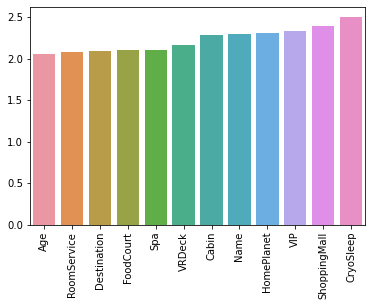

In [1257]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

I took the feature VIP, since it is in the middle, to see about how many rows we have missing data, so about 93 give or less

In [1258]:
df_train[df_train['Name'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


In [1259]:
df_train['LastName'] = df_train['Name'].str.split(' ',expand=True)[1]
df_test['LastName'] = df_test['Name'].str.split(' ',expand=True)[1]

df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,Hontichre


Realistically speaking, a first name has no way of determining if someone will live or die, however a last name could imply from a higher status family with different lifestyles, and so the importance of a last name surpasses the first name. That is why I am dropping the first name column

In [1260]:
df_train['LastName'].value_counts() #we have 2217 unique last names  

Casonston      18
Oneiles        16
Domington      15
Litthews       15
Garnes         14
               ..
Ecate           1
Fuenterson      1
Blentrary       1
Asivetfuel      1
Cookentaney     1
Name: LastName, Length: 2217, dtype: int64

Most values of last name are in 1, which I personally believe it makes the information provided a bit useless.

In [1261]:
df_train = df_train.drop(columns=['LastName'])
df_test = df_test.drop(columns=['LastName'])

In [1262]:
df_train[df_train['VIP'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,False
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,True
145,0165_01,Mars,True,F/37/P,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,True
228,0244_02,Mars,True,F/47/S,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,True
566,0593_01,Mars,False,D/24/P,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,True
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,False
8542,9122_01,Earth,True,G/1469/S,55 Cancri e,55.0,NaN,0.0,0.0,0.0,0.0,0.0,False
8630,9205_03,Europa,True,B/300/P,TRAPPIST-1e,52.0,NaN,0.0,0.0,0.0,0.0,0.0,True


<h3>Feature Engineering</h3>

We look at each feature of data missing and see if we can save the data instead of dropping the feature

From the description we can see that the columns RoomService, FoodCourt, ShoppingMall, Spa, VRDeck. Are all bill amounts that each passanger has billed at the Space Titanic. By this we can assume if it's NaN it was probably 0

In [1263]:
columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df_train[columns] = df_train[columns].fillna(0)
df_test[columns] = df_train[columns].fillna(0)

Now we can see that it took care of 5 features

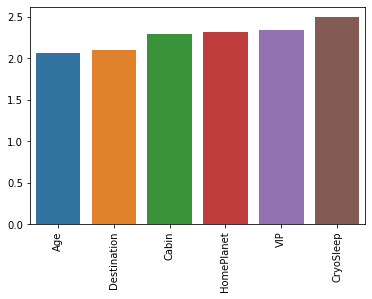

In [1264]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Using the same logic, VIP is a True or False value in which the passanger has purchased a VIP ticket. Logically we can fill the NaN values with False, since most likely those passagners did not purchase any.

We can see that only 74 passangers purchase it, and most people did not

In [1265]:
df_train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [1266]:
df_train['VIP'] = df_train['VIP'].fillna(False)

This can be also applied to CryoSleep as it was a choice if to be put in it or not

In [1267]:
df_train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [1268]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)

We are left now with only 5 features

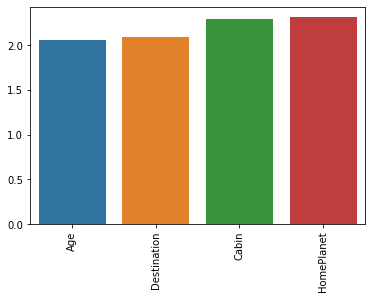

In [1269]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Let's see the correlation between Age and Transported

In [1270]:
df_train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

c:\Users\dagui\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

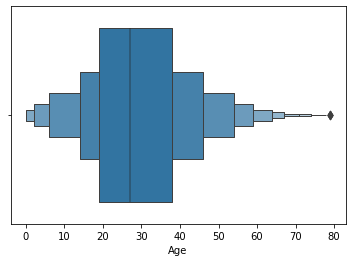

In [1271]:
sns.boxenplot(df_train['Age'])

For both Graphs, we can see that both populations that were either Transported or not had a median of around 27

<AxesSubplot:xlabel='Transported', ylabel='Age'>

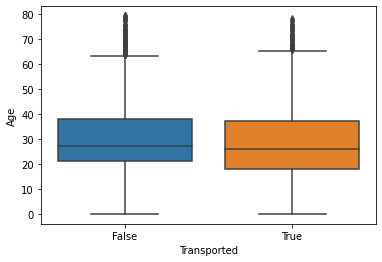

In [1272]:
sns.boxplot(data=df_train,y='Age',x='Transported')

In [1273]:
np.dtype(df_train['Age'])

dtype('float64')

In [1274]:
df_train['Age'] = df_train['Age'].fillna(27)
df_test['Age'] = df_test['Age'].fillna(27)

<AxesSubplot:xlabel='Age', ylabel='Count'>

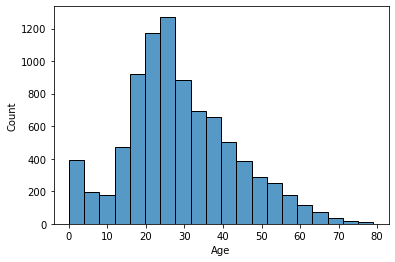

In [1275]:
sns.histplot(data=df_train, x="Age",bins=20)

Since the pricess of different services are spread out we can add them to total_bill feature that we can create

In [1276]:
df_train['TotalBill'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train = df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

df_test['TotalBill'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test = df_test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1)

First we look at Home Planet

In [1277]:
df_train[df_train['HomePlanet'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,TotalBill
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,True,0.0
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,False,9307.0
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,True,0.0
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,False,1288.0
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,True,0.0
...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,False,1299.0
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,False,7177.0
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,False,True,2416.0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,False,1148.0


In [1278]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

we are missing 87 rows, so what I am thinking is that using passengerId we can find who else the passanger of missing Homeplanet was traveling with. find a percentage of the likely home planet within that group.

For that we can split the passenger id into two features
gggg_pp -> [gggg] instead

In [1279]:
df_train['Group'] = df_train['PassengerId'].str.split('_',expand=True)[0]
df_train = df_train.drop(['PassengerId'],axis=1)
df_train['Group'] = pd.to_numeric(df_train['Group'])

df_test['Group'] = df_test['PassengerId'].str.split('_',expand=True)[0]
df_test = df_test.drop(['PassengerId'],axis=1)
df_test['Group'] = pd.to_numeric(df_test['Group'])

Since Cabin contains three information, deck/num/side we want to create three features from it

In [1280]:
df_train[df_train['Cabin'].isnull()]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,TotalBill,Group
15,Earth,False,NaN,TRAPPIST-1e,31.0,False,False,908.0,12
93,Mars,True,NaN,TRAPPIST-1e,31.0,False,True,0.0,101
103,Europa,False,NaN,TRAPPIST-1e,32.0,False,False,5109.0,110
222,Mars,False,NaN,TRAPPIST-1e,37.0,False,False,1048.0,239
227,Mars,True,NaN,TRAPPIST-1e,43.0,False,True,0.0,244
...,...,...,...,...,...,...,...,...,...
8209,Europa,False,NaN,55 Cancri e,53.0,False,False,5066.0,8772
8475,Europa,False,NaN,55 Cancri e,36.0,True,False,7397.0,9057
8485,Europa,True,NaN,55 Cancri e,25.0,False,True,0.0,9069
8509,Earth,True,NaN,TRAPPIST-1e,1.0,False,False,0.0,9081


In [1281]:
df_train['Deck']= (df_train['Cabin'].str.split('/',expand=True))[0]
df_train['CabinNumber']= (df_train['Cabin'].str.split('/',expand=True))[1]
df_train['CabinSide']= (df_train['Cabin'].str.split('/',expand=True))[2]
df_train = df_train.drop(['Cabin'],axis=1)

df_test['Deck']= (df_test['Cabin'].str.split('/',expand=True))[0]
df_test['CabinNumber']= (df_test['Cabin'].str.split('/',expand=True))[1]
df_test['CabinSide']= (df_test['Cabin'].str.split('/',expand=True))[2]
df_test = df_test.drop(['Cabin'],axis=1)

Now we go back to see how many value counts of home planets within same groups

In [1282]:
df_train[df_train['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalBill,Group,Deck,CabinNumber,CabinSide
59,NaN,True,TRAPPIST-1e,33.0,False,True,0.0,64,E,3,S
113,NaN,False,TRAPPIST-1e,39.0,False,False,9307.0,119,A,0,P
186,NaN,True,55 Cancri e,24.0,False,True,0.0,210,D,6,P
225,NaN,False,TRAPPIST-1e,18.0,False,False,1288.0,242,F,46,S
234,NaN,True,55 Cancri e,54.0,False,True,0.0,251,C,11,S
...,...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,TRAPPIST-1e,25.0,False,False,1299.0,9084,E,582,P
8613,NaN,False,55 Cancri e,53.0,False,False,7177.0,9194,E,603,S
8666,NaN,False,55 Cancri e,38.0,False,True,2416.0,9248,F,1792,S
8674,NaN,False,TRAPPIST-1e,13.0,False,False,1148.0,9257,F,1892,P


In [1283]:
percent_nan = percent_missing(df_train)
percent_nan

Destination    2.093639
Deck           2.289198
CabinNumber    2.289198
CabinSide      2.289198
HomePlanet     2.312205
dtype: float64

It seems, most people are from Earth and that out of the three groups, Earth had a higher percentage of it failing

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

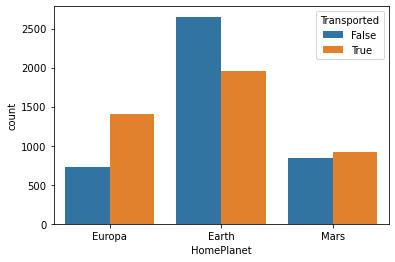

In [1284]:
sns.countplot(data=df_train,x='HomePlanet',hue='Transported')

<AxesSubplot:xlabel='Destination', ylabel='count'>

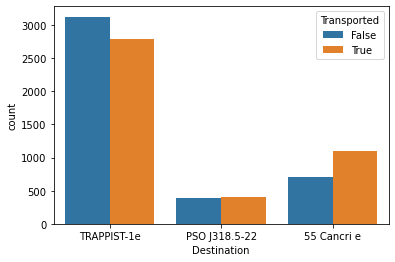

In [1285]:
sns.countplot(data=df_train,x='Destination',hue='Transported')

Doing one hot encoding to then compare

In [1286]:
df_train = df_train.drop(['CabinNumber'],axis=1)
my_object_df_train = df_train.select_dtypes(include='object')
my_numeric_df_train = df_train.select_dtypes(exclude='object')

df_test = df_test.drop(['CabinNumber'],axis=1)
my_object_df_test = df_test.select_dtypes(include='object')
my_numeric_df_test = df_test.select_dtypes(exclude='object')

Since there are only 4 rows in which this is the case, we will drop them

In [1287]:
df_train[(df_train['Destination'].isnull()) & (df_train['HomePlanet'].isnull())]

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalBill,Group,Deck,CabinSide
347,NaN,False,NaN,23.0,False,False,720.0,382,G,P
5208,NaN,False,NaN,43.0,False,True,922.0,5555,G,S
5687,NaN,False,NaN,52.0,False,True,1040.0,6031,F,S
6629,NaN,False,NaN,12.0,False,False,0.0,6992,G,P


In [1288]:
df_train = df_train.drop(df_train[(df_train['Destination'].isnull()) & (df_train['HomePlanet'].isnull())].index) 

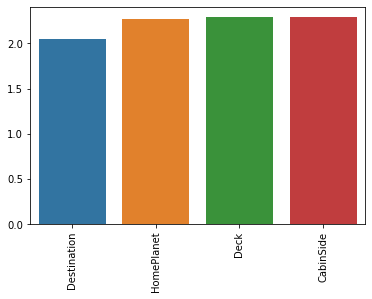

In [1289]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [1290]:
df_train['Group'].value_counts()

4256    8
5756    8
8796    8
984     8
5133    8
       ..
4175    1
8273    1
85      1
6230    1
4098    1
Name: Group, Length: 6214, dtype: int64

In [1291]:
df_train[df_train['HomePlanet'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalBill,Group,Deck,CabinSide
59,NaN,True,TRAPPIST-1e,33.0,False,True,0.0,64,E,S
113,NaN,False,TRAPPIST-1e,39.0,False,False,9307.0,119,A,P
186,NaN,True,55 Cancri e,24.0,False,True,0.0,210,D,P
225,NaN,False,TRAPPIST-1e,18.0,False,False,1288.0,242,F,S
234,NaN,True,55 Cancri e,54.0,False,True,0.0,251,C,S
...,...,...,...,...,...,...,...,...,...,...
8515,NaN,False,TRAPPIST-1e,25.0,False,False,1299.0,9084,E,P
8613,NaN,False,55 Cancri e,53.0,False,False,7177.0,9194,E,S
8666,NaN,False,55 Cancri e,38.0,False,True,2416.0,9248,F,S
8674,NaN,False,TRAPPIST-1e,13.0,False,False,1148.0,9257,F,P


In [1292]:
def Fill_Planet_By_Group(df):
    df_of_notnull_planets = df[df['HomePlanet'].notnull()]
    df_of_null_planets = df[df['HomePlanet'].isnull()]
    count_of_planets_group_not_found = 0
    #check if the group of a homeplanet that is null, is found in a homeplanet that is not null, then use the value of homeplanet on the not null for the null
    for index, row in df_of_null_planets.iterrows():
        match_group = row['Group']
        if match_group in df_of_notnull_planets['Group'].values:
            fill_in_planet = df_of_notnull_planets[df_of_notnull_planets['Group']==match_group].iloc[0]['HomePlanet']
            df.at[index,'HomePlanet'] = fill_in_planet
        else:
            count_of_planets_group_not_found += 1
    return df, count_of_planets_group_not_found



In [1293]:
test_count = 0
df_train,test_count = Fill_Planet_By_Group(df=df_train)
test_count
df_test,test_count = Fill_Planet_By_Group(df=df_test)

We can see that with the method, we managed to cut down the missing data from 2.3% to 1.2% from associating groups that should come from the same planet

In [1294]:
df_train = df_train[df_train['HomePlanet'].notna()]
df_test = df_test[df_test['HomePlanet'].notna()]

In [1295]:
percent_nan = percent_missing(df_train)
percent_nan

Destination    2.074350
Deck           2.272462
CabinSide      2.272462
dtype: float64

In [1296]:
df_train[df_train['Destination'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalBill,Group,Deck,CabinSide
47,Mars,True,NaN,19.0,False,True,0.0,45,F,P
128,Earth,False,NaN,34.0,False,False,793.0,138,E,P
139,Earth,False,NaN,41.0,False,False,607.0,152,F,P
430,Earth,True,NaN,50.0,False,False,0.0,462,G,S
468,Europa,True,NaN,24.0,False,True,0.0,504,B,S
...,...,...,...,...,...,...,...,...,...,...
8372,Earth,True,NaN,20.0,False,True,0.0,8956,G,P
8551,Mars,True,NaN,41.0,False,True,0.0,9130,F,S
8616,Mars,True,NaN,33.0,False,True,0.0,9195,F,S
8621,Europa,False,NaN,41.0,True,False,17041.0,9197,C,P


At this point we can either drop the rows of the HomePlanet, or fill them in with some value of planet, although most of the population is from Earth. I decided to drop the 108 rows that did not match a group as to not assume base on nothing, and avoid filling in a random planet.

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

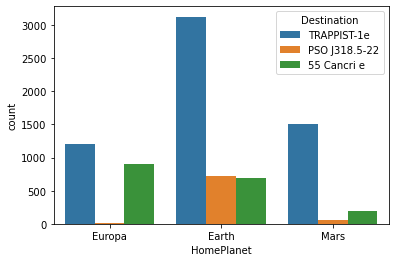

In [1297]:
sns.countplot(data=df_train,x='HomePlanet',hue='Destination')

We see that when the HomePlanet is Mars, it is more than likely going to be going towards TRAPPIST-le, as well as in Earth. However in Europa it is closer to a half and half between TRAPPIST-le and 55 Cancri e

In [1298]:
def Fill_Destination_By_Planet(df):
    df_of_null_destination = df[df['Destination'].isnull()]
    fill_in_destination = "None"
    for index, row in df_of_null_destination.iterrows():
        if row['HomePlanet'] == 'Mars' or row['HomePlanet'] == 'Earth':
            fill_in_destination = 'TRAPPIST-1e'
        else:
            df.drop(index)
        df.at[index,'Destination'] = fill_in_destination
    return df

In [1299]:
df_train = Fill_Destination_By_Planet(df_train)
df_test = Fill_Destination_By_Planet(df_test)

In [1300]:
percent_nan = percent_missing(df_train)
percent_nan

Deck         2.272462
CabinSide    2.272462
dtype: float64

Now we can move to Deck and CabinSide

In [1301]:
df_train[df_train['Deck'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalBill,Group,Deck,CabinSide
15,Earth,False,TRAPPIST-1e,31.0,False,False,908.0,12,NaN,NaN
93,Mars,True,TRAPPIST-1e,31.0,False,True,0.0,101,NaN,NaN
103,Europa,False,TRAPPIST-1e,32.0,False,False,5109.0,110,NaN,NaN
222,Mars,False,TRAPPIST-1e,37.0,False,False,1048.0,239,NaN,NaN
227,Mars,True,TRAPPIST-1e,43.0,False,True,0.0,244,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8209,Europa,False,55 Cancri e,53.0,False,False,5066.0,8772,NaN,NaN
8475,Europa,False,55 Cancri e,36.0,True,False,7397.0,9057,NaN,NaN
8485,Europa,True,55 Cancri e,25.0,False,True,0.0,9069,NaN,NaN
8509,Earth,True,TRAPPIST-1e,1.0,False,False,0.0,9081,NaN,NaN


In [1302]:
def Fill_A_with_B(df,a_feature,b_feature):
    df_of_notnull_a = df[df[a_feature].notnull()]
    df_of_null_a = df[df[a_feature].isnull()]
    #check if the group of a homeplanet that is null, is found in a homeplanet that is not null, then use the value of homeplanet on the not null for the null
    for index, row in df_of_null_a.iterrows():
        match_b = row[b_feature]
        if match_b in df_of_notnull_a[b_feature].values:
            fill_in_a = df_of_notnull_a[df_of_notnull_a[b_feature]==match_b].iloc[0][a_feature]
            df.at[index,a_feature] = fill_in_a
    return df

In [1303]:
df_train = Fill_A_with_B(df_train,'Deck','Group')
df_train = Fill_A_with_B(df_train,'CabinSide','Group')
df_test = Fill_A_with_B(df_train,'Deck','Group')
df_test = Fill_A_with_B(df_train,'CabinSide','Group')

In [1304]:
df_train = df_train[df_train['Deck'].notna()]
df_train = df_train[df_train['CabinSide'].notna()]
df_test = df_test[df_test['Deck'].notna()]
df_test = df_test[df_test['CabinSide'].notna()]

In [1305]:
percent_nan = percent_missing(df_train)
percent_nan

Series([], dtype: float64)

<h1>One Hot Encoding</h1>

In [1306]:
one_hot_econded_data_df_train = pd.get_dummies(df_train, columns=['Deck','CabinSide','Destination','HomePlanet'],drop_first=True)
one_hot_econded_data_df_train

one_hot_econded_data_df_test = pd.get_dummies(df_test, columns=['Deck','CabinSide','Destination','HomePlanet'],drop_first=True)
one_hot_econded_data_df_test

,CryoSleep,Age,VIP,Transported,TotalBill,Group,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,CabinSide_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,False,39.0,False,False,0.0,1,1,0,0,0,0,0,0,0,0,1,1,0
1,False,24.0,False,True,736.0,2,0,0,0,0,1,0,0,1,0,1,0,0
2,False,58.0,True,False,10383.0,3,0,0,0,0,0,0,0,1,0,1,1,0
3,False,33.0,False,False,5176.0,3,0,0,0,0,0,0,0,1,0,1,1,0
4,False,16.0,False,True,1091.0,4,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,False,8536.0,9276,0,0,0,0,0,0,0,0,0,0,1,0
8689,True,18.0,False,False,0.0,9278,0,0,0,0,0,1,0,1,1,0,0,0
8690,False,26.0,False,True,1873.0,9279,0,0,0,0,0,1,0,1,0,1,0,0
8691,False,32.0,False,False,4637.0,9280,0,0,0,1,0,0,0,1,0,0,1,0


Concat gave duplicate columns so we switched to merge with inner

In [1307]:
df_train = pd.merge(my_numeric_df_train,one_hot_econded_data_df_train,how='inner')

df_test = pd.merge(my_numeric_df_test,one_hot_econded_data_df_test,how='inner')

In [1308]:
from sklearn.linear_model import LogisticRegression

In [1309]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
log_model = LogisticRegression()

Now we separate them into proper test and train sets

In [1310]:
X = df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [1311]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [1312]:
scaler = StandardScaler()

In [1313]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(x_test)

In [1314]:
scaled_X_train.shape

(5972, 17)

In [1315]:
y_train.shape

(5972,)

In [1316]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [1317]:
log_model.coef_

array([[ 0.87309179, -0.19515523, -0.03800756, -0.4601968 ,  0.07985128,
         0.2170005 ,  0.25656468, -0.03719537, -0.10787114,  0.09724462,
        -0.03817486, -0.13889941,  0.25379799, -0.09204245, -0.15463451,
         0.47183367,  0.19609065]])

In [1318]:
y_pred = log_model.predict(scaled_X_test)
y_pred

array([False,  True,  True, ..., False,  True,  True])

In [1319]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1320]:
accuracy_score(y_test,y_pred)

0.7328125

In [1321]:
from sklearn.metrics import plot_confusion_matrix

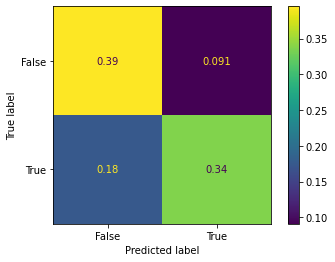

In [1323]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='all')

In [1324]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

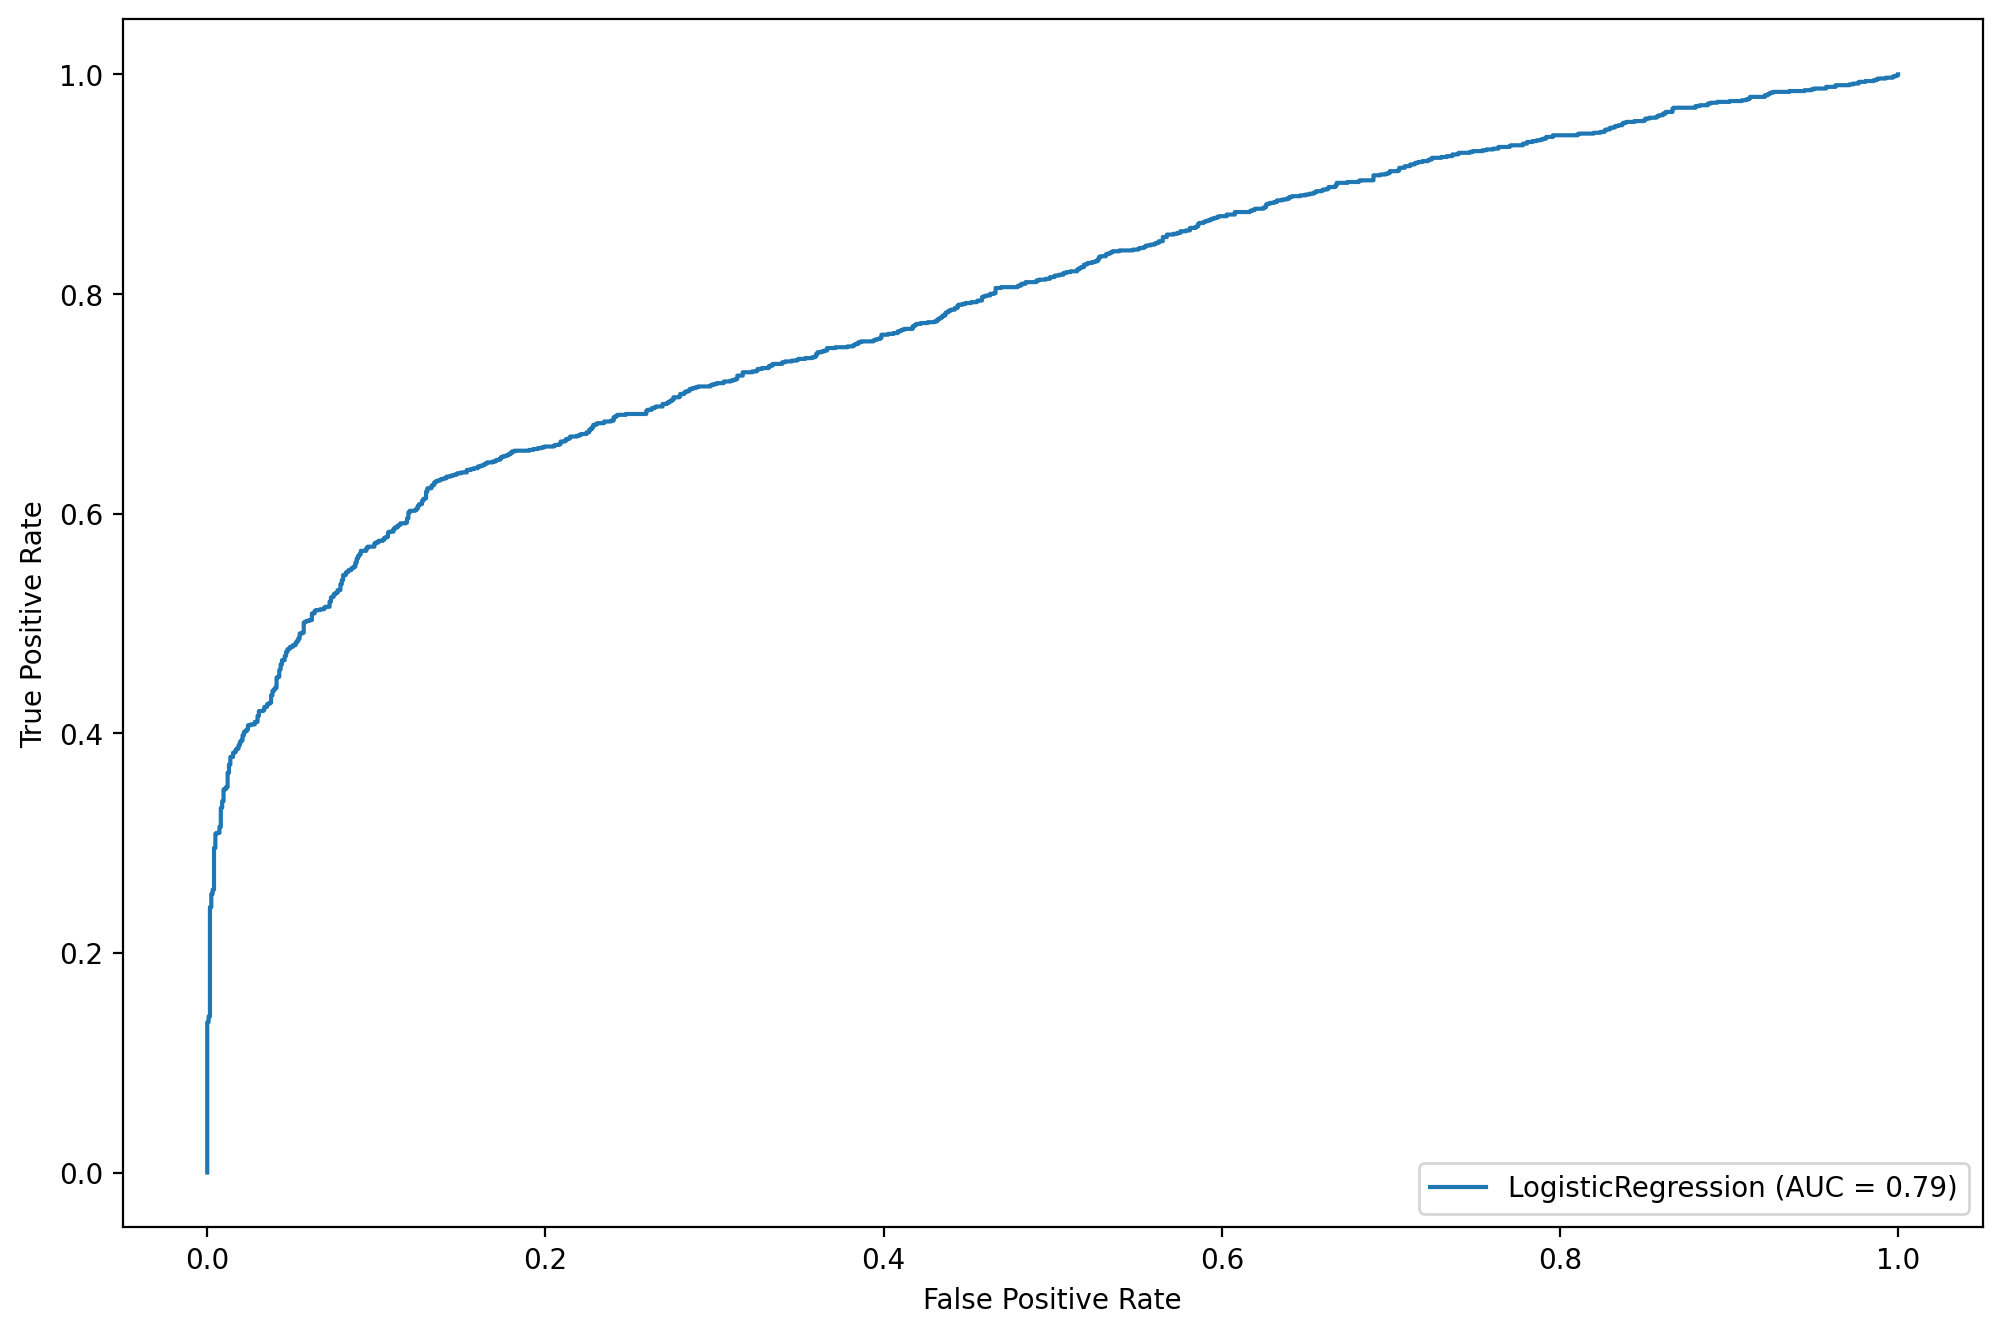

In [1325]:
fig,ax = plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(log_model,scaled_X_test,y_test,ax=ax)